In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

In [2]:
# plots setup
sns.set_palette("Set2")
sns.set_context(context="paper", font_scale=2)

mpl.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "font.serif": "Computer Modern Roman",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "font.size": 22,
    }
)
use_pgf = True
plt.rcParams["text.usetex"] = True
hatches=['x',"o","/","\\"]

In [3]:
num_days=30 
cell_id=5060 # duomo

In [7]:
# parsing data
df=pd.read_csv(os.path.join("raw-dataset","sms-call-internet-mi-2013-11-01.txt"),sep='\t',names=["cell-id","time","code","sms-in","sms-out","call-in","call-out","internet"])
df.fillna(0,inplace=True)
df=df[df["cell-id"]==cell_id]

for i in range(11,13):
    for j in range(1,31 if i==11 else 32):
        day_df=pd.read_csv(os.path.join("raw-dataset",f"sms-call-internet-mi-2013-{i:02}-{j:02}.txt"),sep='\t',names=["cell-id","time","code","sms-in","sms-out","call-in","call-out","internet"])
        day_df.fillna(0,inplace=True)
        df=pd.concat([df,day_df[day_df["cell-id"]==cell_id]],ignore_index=True)

df=df.groupby("time").count().reset_index().rename(columns={"cell-id":"requests"})

In [ ]:
# dropping useless columns
df=df[["time","requests"]]

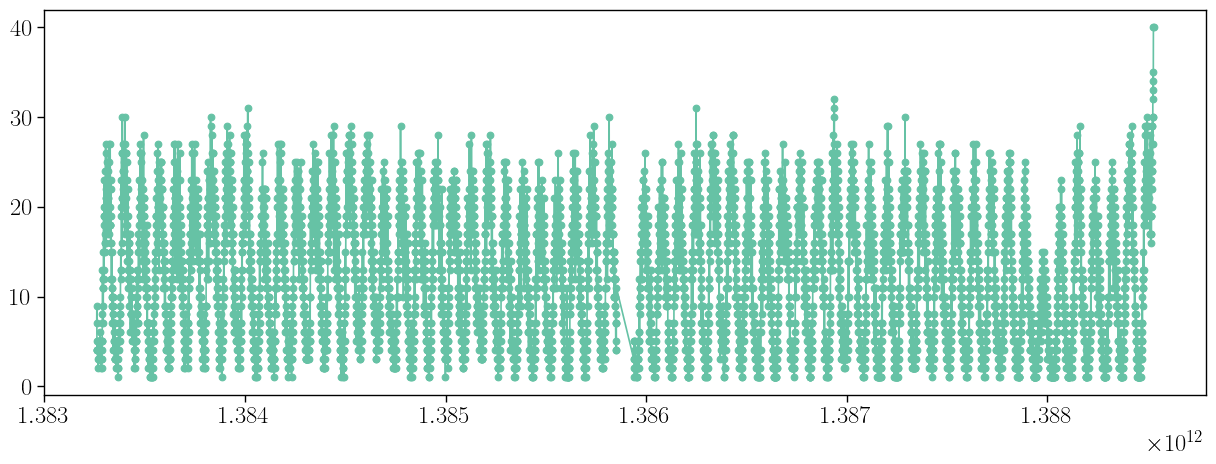

In [6]:
# showing data
df.head()

plt.figure(figsize=(15,5))
plt.plot(df["time"],df["requests"])
plt.scatter(df["time"],df["requests"])
plt.show()

In [16]:
# # normilizing requests
# max_requests=requests["requests"].max()
# requests["requests"]=requests["requests"]/max_requests

In [17]:
# converting time
df["time"]=df["time"].apply(lambda ms:datetime.fromtimestamp(ms/1000))

In [18]:
# reducing granularity to hours
df["time"]=df["time"].apply(lambda t:datetime(t.year,t.month,t.day,t.hour))
df=df.groupby("time").sum().reset_index()

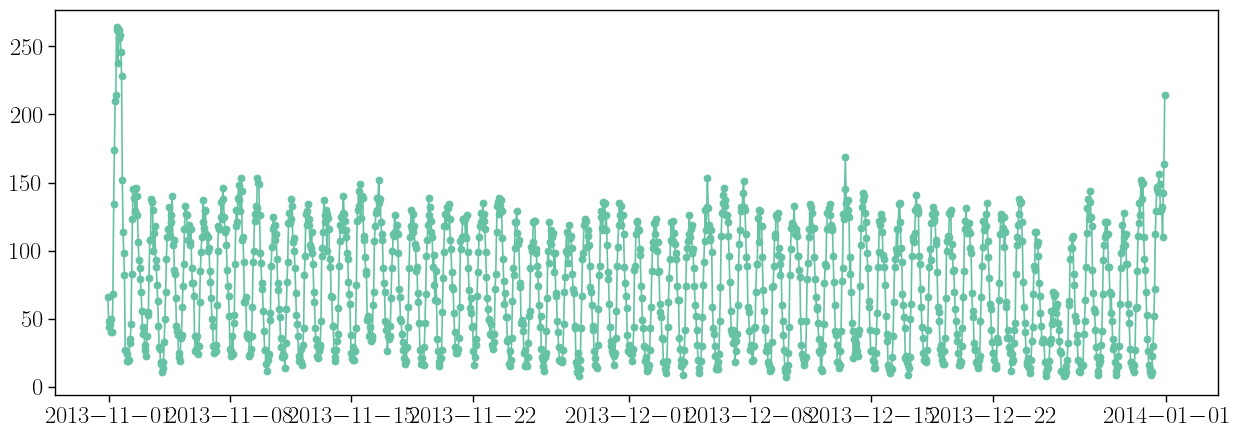

In [19]:
# showing data
df.head()

plt.figure(figsize=(15,5))
plt.plot(df["time"],df["requests"])
plt.scatter(df["time"],df["requests"])
plt.show()

In [20]:
# saving results
df.to_csv(f"requests.csv")